In [2]:
#-- Basics Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os 
from sklearn.preprocessing import MinMaxScaler


#-- Metrics Calculation
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_percentage_error as MAPE


#-- Warnings OFF
from warnings import simplefilter

%matplotlib inline

# Loading data

In [3]:
all_results_camargos_narmax_escalar = pd.read_csv(f'../Results/NARMAX/Camargos/Escalar/Samples/all_results.csv')
all_results_camargos_narmax_vetorial = pd.read_csv(f'../Results/NARMAX/Camargos/Vetorial/Samples/all_results.csv')
all_results_furnas_narmax_escalar = pd.read_csv(f'../Results/NARMAX/Furnas/Escalar/Samples/all_results.csv')
all_results_furnas_narmax_vetorial = pd.read_csv(f'../Results/NARMAX/Furnas/Vetorial/Samples/all_results.csv')

all_results_camargos_etuni_escalar = pd.read_csv(f'../Results/E-TUNI/Camargos/Escalar/Samples/all_results.csv')
all_results_camargos_etuni_vetorial = pd.read_csv(f'../Results/E-TUNI/Camargos/Vetorial/Samples/all_results.csv')
all_results_furnas_etuni_escalar = pd.read_csv(f'../Results/E-TUNI/Furnas/Escalar/Samples/all_results_escalar.csv')
all_results_furnas_etuni_vetorial = pd.read_csv(f'../Results/E-TUNI/Furnas/Vetorial/Samples/all_results.csv')


In [4]:
all_results_furnas_etuni_vetorial.groupby('tipo').agg({
    'MSE':['mean', 'std', 'min', 'max', 'median'],
    'MAE':['mean', 'std', 'min', 'max', 'median'],
    'MAPE':['mean', 'std', 'min', 'max', 'median'],
    'R2':['mean', 'std', 'min', 'max', 'median']
}).T

tipo                 Teste         Treino     Validation
MSE  mean    177225.636403  110651.959578   92780.834737
     std      12657.427844    4607.925370   10364.184290
     min     150583.957129   97949.959134   69805.643935
     max     213628.536549  124369.697088  122536.051035
     median  176210.978083  110537.694941   93284.254929
MAE  mean       281.547350     221.510156     210.692253
     std         13.003137       4.537071      12.125670
     min        251.462158     208.989822     178.947594
     max        310.955301     235.308178     252.036370
     median     280.657455     221.549041     210.315041
MAPE mean         0.338390       0.253123       0.304337
     std          0.026825       0.007172       0.020467
     min          0.281946       0.233510       0.256096
     max          0.412768       0.271134       0.373850
     median       0.335046       0.252711       0.303985
R2   mean         0.526454       0.712340       0.575843
     std          0.033821       0.011979       0.047381
     min          0.429185       0.676678       0.439814
     max          0.597640       0.745361       0.680876
     median       0.529165       0.712637       0.573541

In [5]:
def plot_distribution_metrics(dataset, title_name):
    figure, axes = plt.subplots(2, 2, figsize=(12,12))
    figure.suptitle(f'Distribuição Métricas - {title_name}', fontsize=12)


    my_palette = {'Treino':'green', 'Validation':'blue', 'Teste':'red'}

    sns.histplot(
        ax=axes[0,0],
        data = dataset,
        x = 'MSE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count',
        legend=True)
    axes[0,0].set_xlabel('MSE')
    axes[0,0].set_ylabel('Frequência')

    sns.histplot(
        ax=axes[0,1],
        data = dataset,
        x = 'MAE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count',
        legend=False)
    axes[0,1].set_xlabel('MAE')
    axes[0,1].set_ylabel('Frequência')

    sns.histplot(
        ax=axes[1,0],
        data = dataset,
        x = 'MAPE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count',
        legend=False)
    axes[1,0].set_xlabel('MAPE')
    axes[1,0].set_ylabel('Frequência')
    axes[1,0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axes[1,0].set_xticks(np.arange(0.0, 1.1, 0.1))


    sns.histplot(
        ax=axes[1,1],
        data = dataset,
        x = 'R2',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        label='NARMAX Escalar',
        stat='count',
        legend=False)
    axes[1,1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axes[1,1].set_xticks(np.arange(0.0, 1.1, 0.1))
    axes[1,1].set_xlabel('R2')
    axes[1,1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.savefig(f'../Figure/Results/Distribution Metrics {title_name}.png', dpi=300)

    print(f'Distribution Metrics - {title_name}')
    display(dataset.groupby('tipo').agg({
        'MSE':['mean', 'std', 'min', 'max', 'median'],
        'MAE':['mean', 'std', 'min', 'max', 'median'],
        'MAPE':['mean', 'std', 'min', 'max', 'median'],
        'R2':['mean', 'std', 'min', 'max', 'median']
    }))


In [6]:

def model_comparison_distribution_metrics(dataset_narmax, dataset_etuni, title_name):
    figure, axes = plt.subplots(2, 2, figsize=(12,12))
    figure.suptitle(f'Comparação da Distribuição das métricas - {title_name}', fontsize=12)

    narmax = dataset_narmax[dataset_narmax.tipo=='Teste']
    narmax['tipo'] = 'NARMAX'

    etuni = dataset_etuni[dataset_etuni.tipo=='Teste']
    etuni['tipo'] = 'E-TUNI'

    all_test = pd.concat([narmax, etuni], ignore_index=True)

    my_palette = {'NARMAX':'blue', 'E-TUNI':'k'}

    sns.histplot(
        ax=axes[0,0],
        data = all_test,
        x = 'MSE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        # binwidth=100,
        stat='count',
        legend=True)
    axes[0,0].set_xlabel('MSE')
    axes[0,0].set_ylabel('Frequência')

    sns.histplot(
        ax=axes[0,1],
        data = all_test,
        x = 'MAE',
        hue='tipo', 
        kde=True, 
        palette=my_palette,
        # binwidth=10,
        stat='count',
        legend=False)
    axes[0,1].set_xlabel('MAE')
    axes[0,1].set_ylabel('Frequência')

    sns.histplot(
        ax=axes[1,0],
        data = all_test,
        x = 'MAPE',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        # binwidth=1,
        stat='count',
        legend=False)
    axes[1,0].set_xlabel('MAPE')
    axes[1,0].set_ylabel('Frequência')
    axes[1,0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axes[1,0].set_xticks(np.arange(0.0, 1.1, 0.1))


    sns.histplot(
        ax=axes[1,1],
        data = all_test,
        x = 'R2',
        hue='tipo', 
        kde=True, 
        palette=my_palette, 
        # binwidth=1,
        stat='count',
        legend=False)
    axes[1,1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axes[1,1].set_xticks(np.arange(0.0, 1.1, 0.1))
    axes[1,1].set_xlabel('R2')
    axes[1,1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.savefig(f'../Figure/Results/Test Model Metrics Comparison {title_name}.png', dpi=300)





In [7]:
from scipy import stats



def wilcoxon_rank_models(narmax_results, etuni_results, model_name, metric='R2'):
    # Filter test data for both models
    narmax_test = narmax_results[narmax_results['tipo'] == 'Teste'][metric]
    etuni_test = etuni_results[etuni_results['tipo'] == 'Teste'][metric]

    # Perform Wilcoxon test
    statistic, p_value = stats.wilcoxon(narmax_test, etuni_test)
    print("\n" + "-"*50 + "\n")
    print(f"Wilcoxon Signed-Ranks Test Results for {model_name}({metric}):")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")

    # Print median values for comparison
    print(f"\nMedian {metric} values:")
    print(f"NARMAX: {narmax_test.median():.4f}")
    print(f"E-TUNI: {etuni_test.median():.4f}")

    # Interpret results
    alpha = 0.05
    print(f"\nAt {alpha} significance level:")
    if p_value < alpha:
        print("Reject H0: There is a significant difference between the models")
    else:
        print("Failed to reject H0: No significant difference between the models")
    print("\n" + "-"*50 + "\n")



# Escalar

Distribution Metrics - Camargos NARMAX Escalar


MSE                                                     \
                   mean         std          min          max       median   
tipo                                                                         
Teste       2281.676327  549.245027  1847.938603  7194.975376  2182.430453   
Treino      2009.658042  616.671940  1231.856374  7620.791586  1990.496523   
Validation  1269.398777  398.766617   970.752881  5145.259256  1236.155630   

                  MAE                                                 MAPE  \
                 mean       std        min        max     median      mean   
tipo                                                                         
Teste       29.342651  3.432837  26.093388  59.973402  28.784247  0.208039   
Treino      27.321967  3.794363  21.935468  60.826785  27.313815  0.190618   
Validation  22.451547  3.455085  19.379565  55.271475  22.182271  0.196559   

                                                          R2            \
                 std       min       max    median      mean       std   
tipo                                                                     
Teste       0.032346  0.181475  0.504702  0.203955  0.669589  0.079537   
Treino      0.030974  0.154675  0.474037  0.188450  0.718747  0.086304   
Validation  0.046139  0.153654  0.631428  0.190210  0.753267  0.077508   

                                          
                 min       max    median  
tipo                                      
Teste      -0.041909  0.732399  0.683961  
Treino     -0.066534  0.827601  0.721429  
Validation -0.000085  0.811315  0.759728

Distribution Metrics - Camargos E-TUNI Escalar


MSE                                                     \
                   mean         std          min          max       median   
tipo                                                                         
Teste       3260.848630  520.760094  2355.944035  4738.595588  3132.512713   
Treino      1028.366701  208.462193   580.538156  1869.333972   986.507425   
Validation  1339.260971  307.373469   517.749140  2126.007248  1312.486715   

                  MAE                                                 MAPE  \
                 mean       std        min        max     median      mean   
tipo                                                                         
Teste       36.622442  2.442389  31.190421  42.245513  36.261849  0.270500   
Treino      20.567763  1.783897  16.474157  28.246860  20.231126  0.160725   
Validation  24.422725  2.448677  16.586586  31.481658  24.209006  0.237765   

                                                          R2            \
                 std       min       max    median      mean       std   
tipo                                                                     
Teste       0.021786  0.224995  0.324928  0.267267  0.527794  0.075412   
Treino      0.011124  0.138377  0.209466  0.158884  0.856575  0.029074   
Validation  0.024706  0.162762  0.321691  0.237934  0.631429  0.084591   

                                          
                 min       max    median  
tipo                                      
Teste       0.313801  0.658834  0.546379  
Treino      0.739287  0.919033  0.862413  
Validation  0.414912  0.857513  0.638797

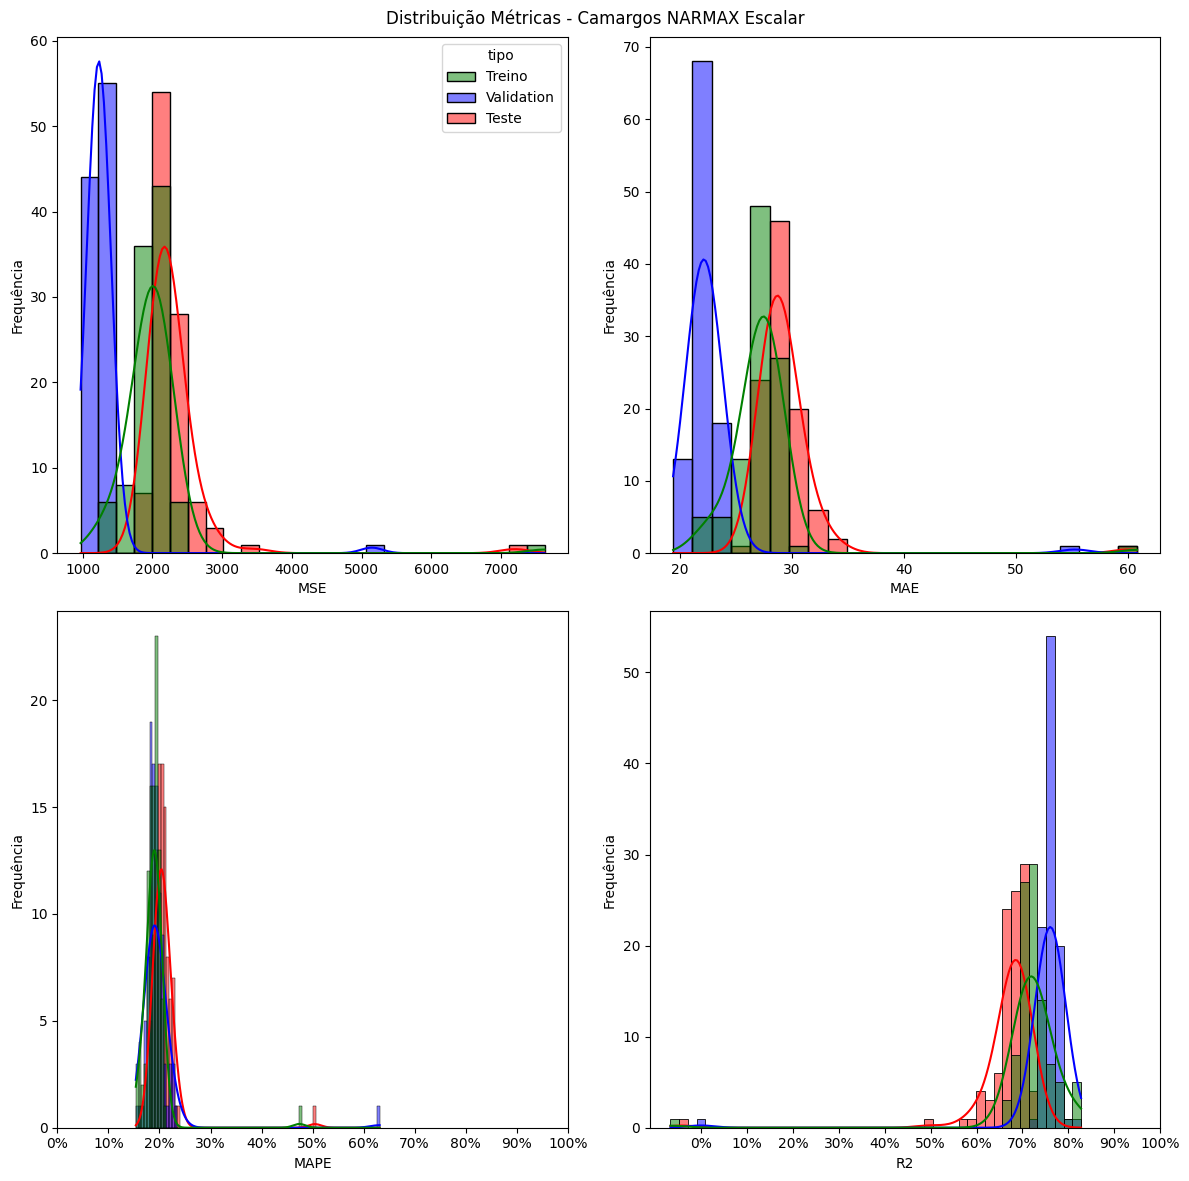

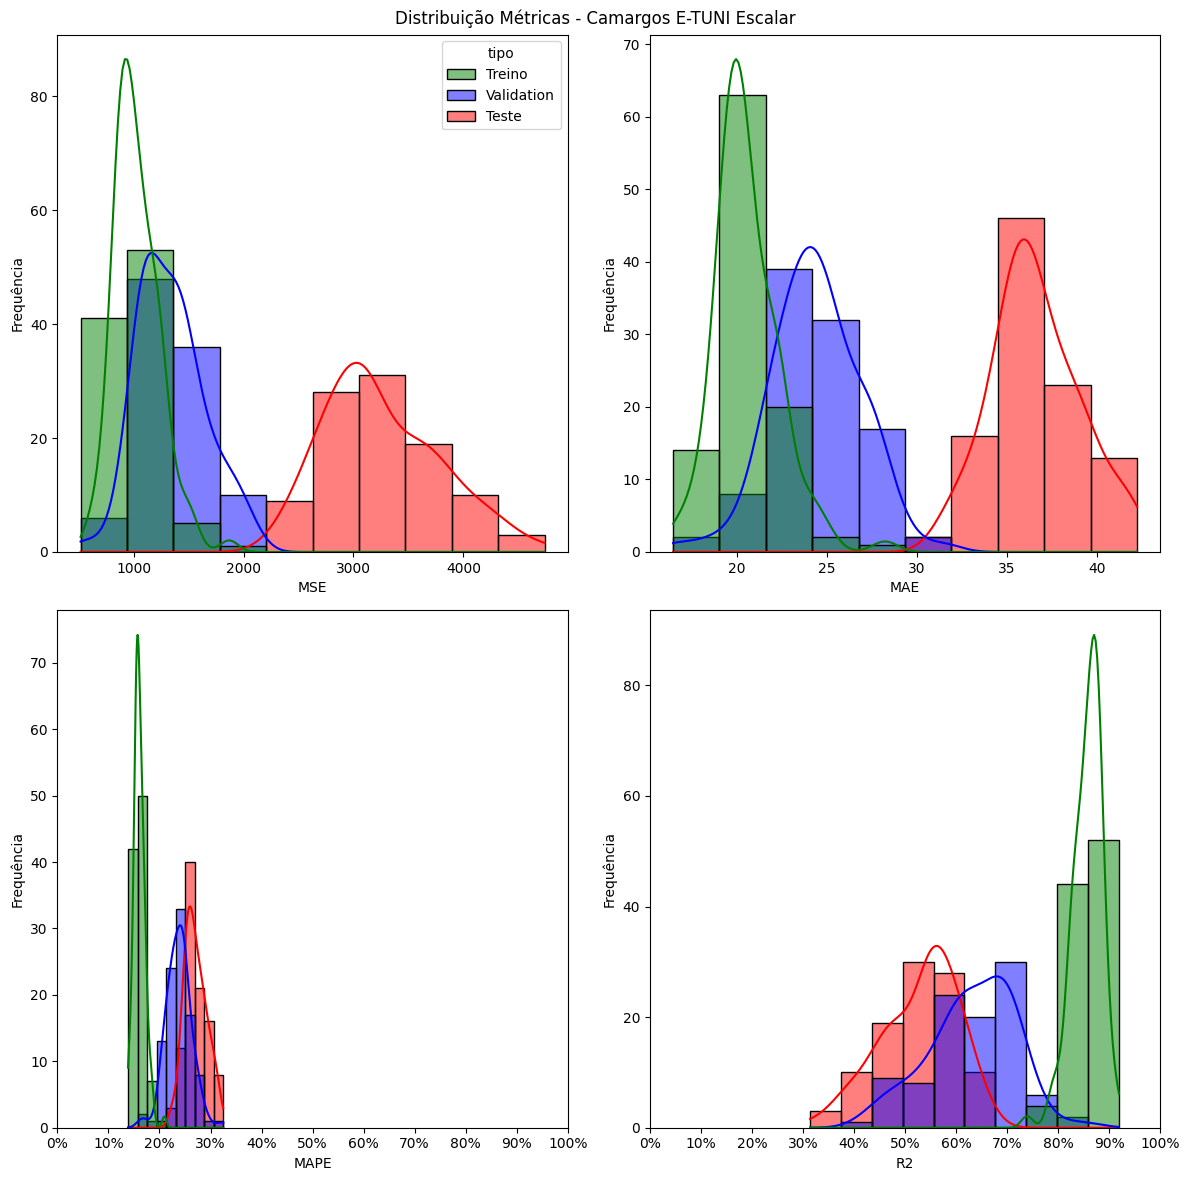

In [8]:
plot_distribution_metrics(all_results_camargos_narmax_escalar, 'Camargos NARMAX Escalar')
plot_distribution_metrics(all_results_camargos_etuni_escalar, 'Camargos E-TUNI Escalar')

In [9]:
for metric in ['MSE', 'MAE', 'MAPE', 'R2']:
    wilcoxon_rank_models(all_results_camargos_narmax_escalar, all_results_camargos_etuni_escalar, "Camargos Escalar", metric)




--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Escalar(MSE):
Statistic: 150.0
p-value: 3.18726485553945e-16

Median MSE values:
NARMAX: 2182.4305
E-TUNI: 3132.5127

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Escalar(MAE):
Statistic: 101.0
p-value: 7.782675474469018e-17

Median MAE values:
NARMAX: 28.7842
E-TUNI: 36.2618

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Escalar(MAPE):
Statistic: 100.0
p-value: 7.559735353237344e-17

Median MAPE values:
NARMAX: 0.2040
E-TUNI: 0.2673

At 0.05 significance level:
Reject H0: There is a significa

/tmp/ipykernel_9416/2692491723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narmax['tipo'] = 'NARMAX'
/tmp/ipykernel_9416/2692491723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etuni['tipo'] = 'E-TUNI'


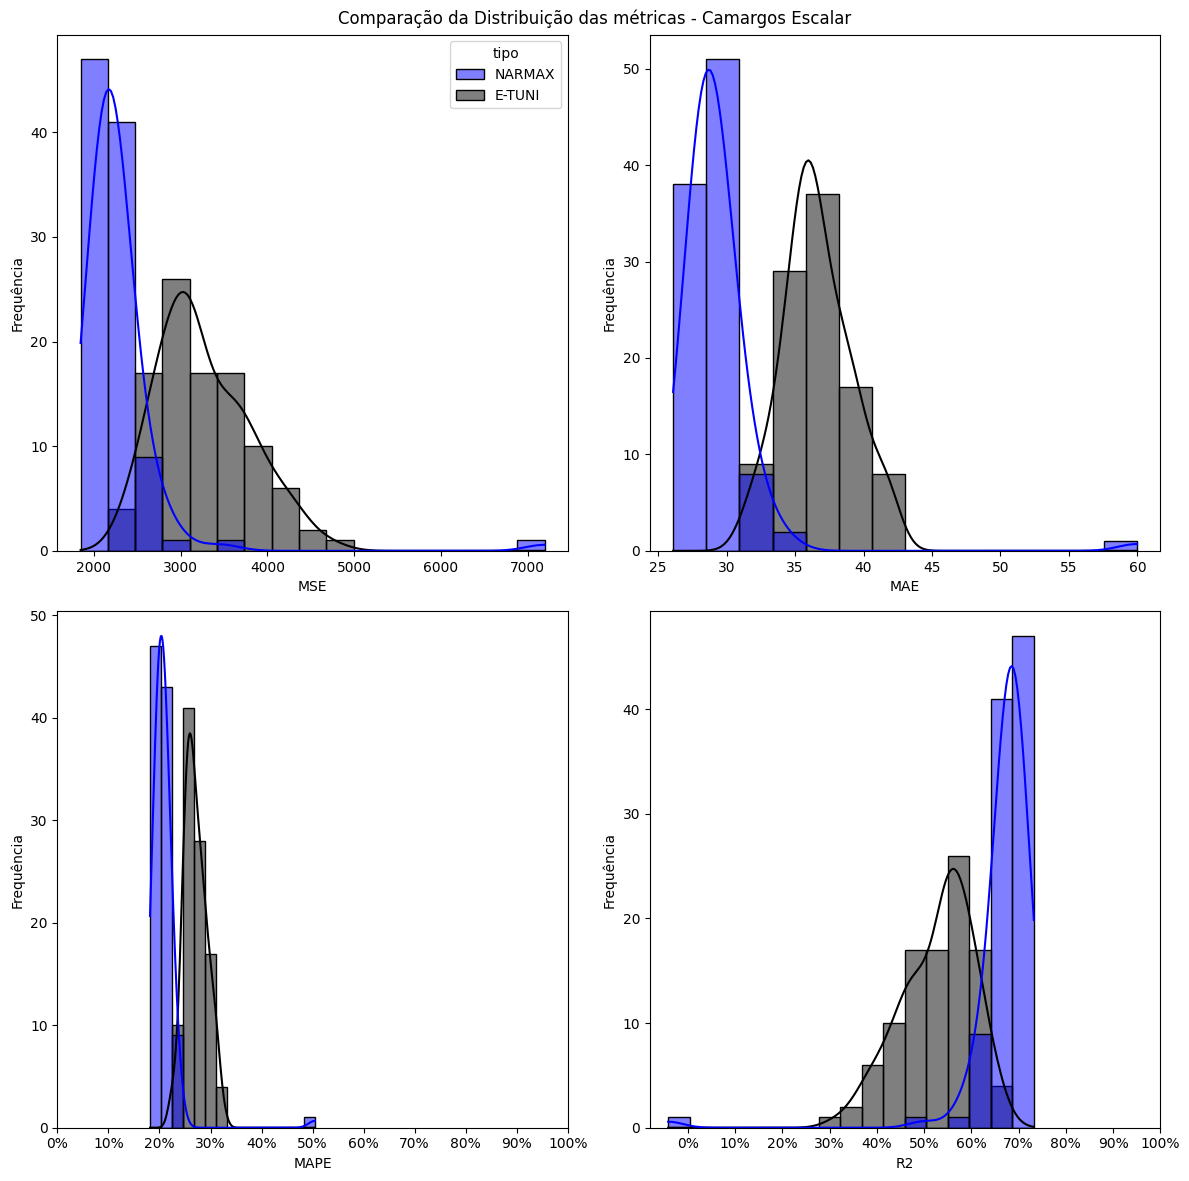

In [10]:
model_comparison_distribution_metrics(all_results_camargos_narmax_escalar, all_results_camargos_etuni_escalar, 'Camargos Escalar')



Distribution Metrics - Furnas NARMAX Escalar


MSE                                              \
                     mean           std            min            max   
tipo                                                                    
Teste       140378.858987  42245.681074  108945.782657  375888.091668   
Treino       86443.578224  49788.290859   39615.987754  414082.771965   
Validation   51099.452570  27643.229025   25533.657726  233855.181265   

                                  MAE                                     \
                   median        mean        std         min         max   
tipo                                                                       
Teste       127003.375947  230.801270  34.939485  200.720136  436.674158   
Treino       83934.167263  186.133470  42.350749  130.242189  449.664194   
Validation   48852.252287  145.707692  39.862446  112.066199  406.358931   

                            MAPE                                          \
                median      mean       std       min       max    median   
tipo                                                                       
Teste       220.560235  0.268021  0.053455  0.226219  0.603447  0.259274   
Treino      185.156033  0.202620  0.048675  0.146661  0.521122  0.199937   
Validation  138.395806  0.224408  0.079328  0.136371  0.746311  0.211091   

                  R2                                          
                mean       std       min       max    median  
tipo                                                          
Teste       0.612797  0.116525 -0.036802  0.699498  0.649690  
Treino      0.772736  0.130896 -0.088643  0.895848  0.779333  
Validation  0.781464  0.118221 -0.000122  0.890801  0.791075

Distribution Metrics - Furnas E-TUNI Escalar


MSE                                              \
                     mean           std            min            max   
tipo                                                                    
Teste       243263.577317  47701.883362  152675.945236  403106.460279   
Treino       24478.617058   5874.482365   11998.519099   38212.457776   
Validation  122350.830655  30056.438370   58706.034761  256491.617761   

                                  MAE                                     \
                   median        mean        std         min         max   
tipo                                                                       
Teste       244083.150969  321.254605  28.790762  258.588954  393.346931   
Treino       24425.394588  104.794695  10.951948   79.402712  130.999528   
Validation  119629.965394  227.795163  23.266630  174.084507  289.333005   

                            MAPE                                          \
                median      mean       std       min       max    median   
tipo                                                                       
Teste       321.590411  0.382315  0.043692  0.307331  0.514080  0.384767   
Treino      104.433465  0.132090  0.011269  0.108540  0.161140  0.130133   
Validation  224.039999  0.328899  0.033001  0.267659  0.409691  0.325321   

                  R2                                          
                mean       std       min       max    median  
tipo                                                          
Teste       0.350001  0.127459 -0.077099  0.592051  0.347811  
Treino      0.936363  0.015272  0.900660  0.968808  0.936502  
Validation  0.440660  0.137406 -0.172578  0.731619  0.453099


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Furnas Escalar(MSE):
Statistic: 192.0
p-value: 1.043664781540866e-15

Median MSE values:
NARMAX: 127003.3759
E-TUNI: 244083.1510

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Furnas Escalar(MAE):
Statistic: 187.0
p-value: 9.071993454725491e-16

Median MAE values:
NARMAX: 220.5602
E-TUNI: 321.5904

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Furnas Escalar(MAPE):
Statistic: 200.0
p-value: 1.3051821803023527e-15

Median MAPE values:
NARMAX: 0.2593
E-TUNI: 0.3848

At 0.05 significance level:
Reject H0: There is a signifi

/tmp/ipykernel_9416/2692491723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narmax['tipo'] = 'NARMAX'
/tmp/ipykernel_9416/2692491723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etuni['tipo'] = 'E-TUNI'


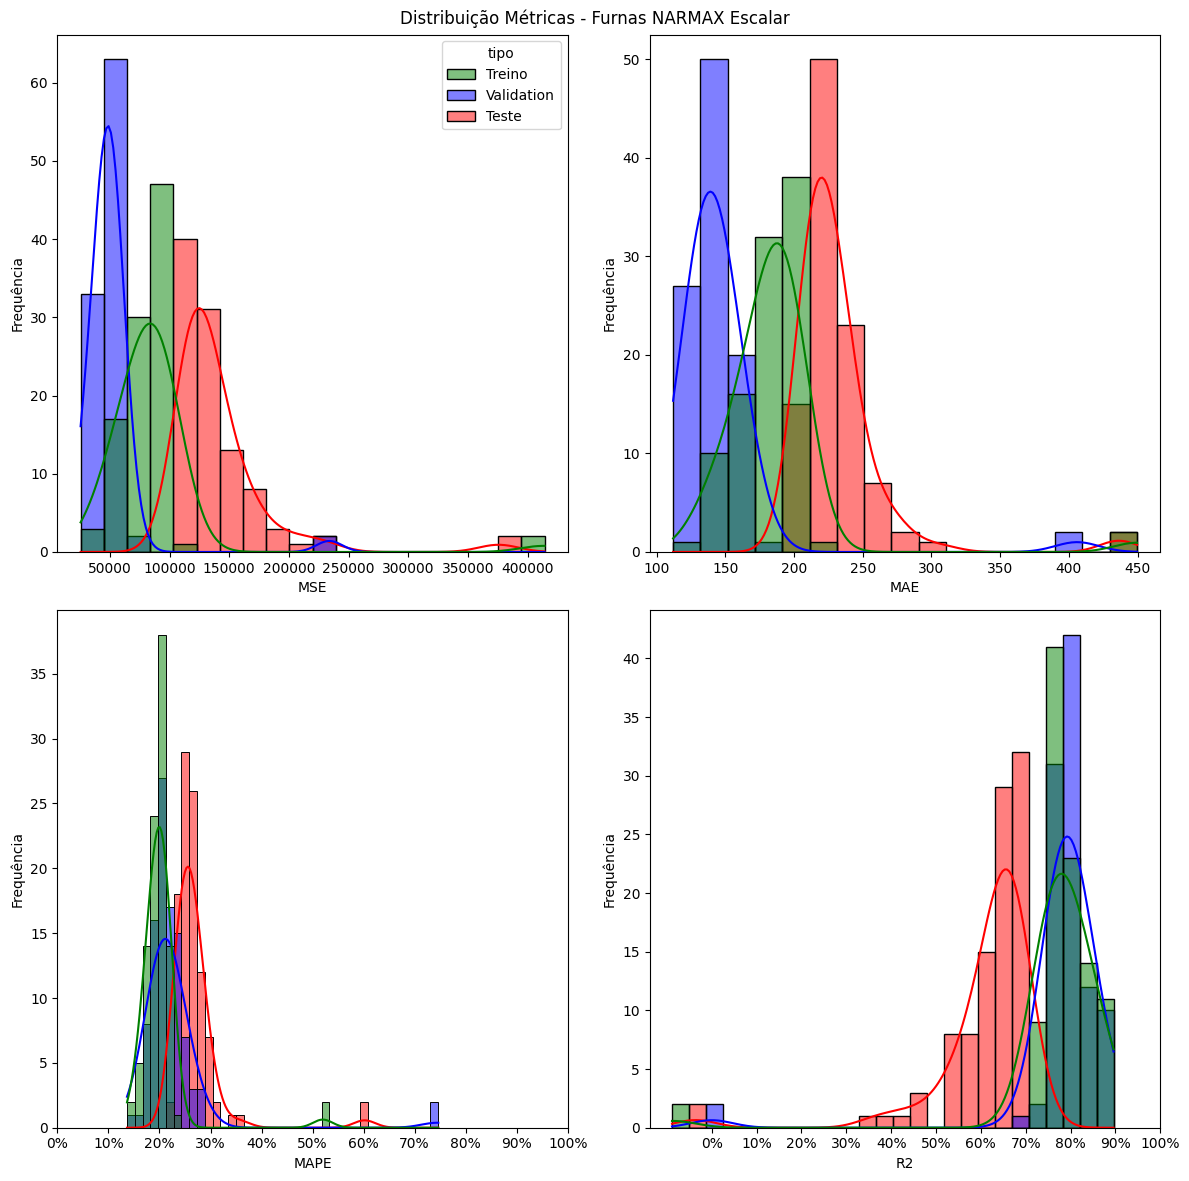

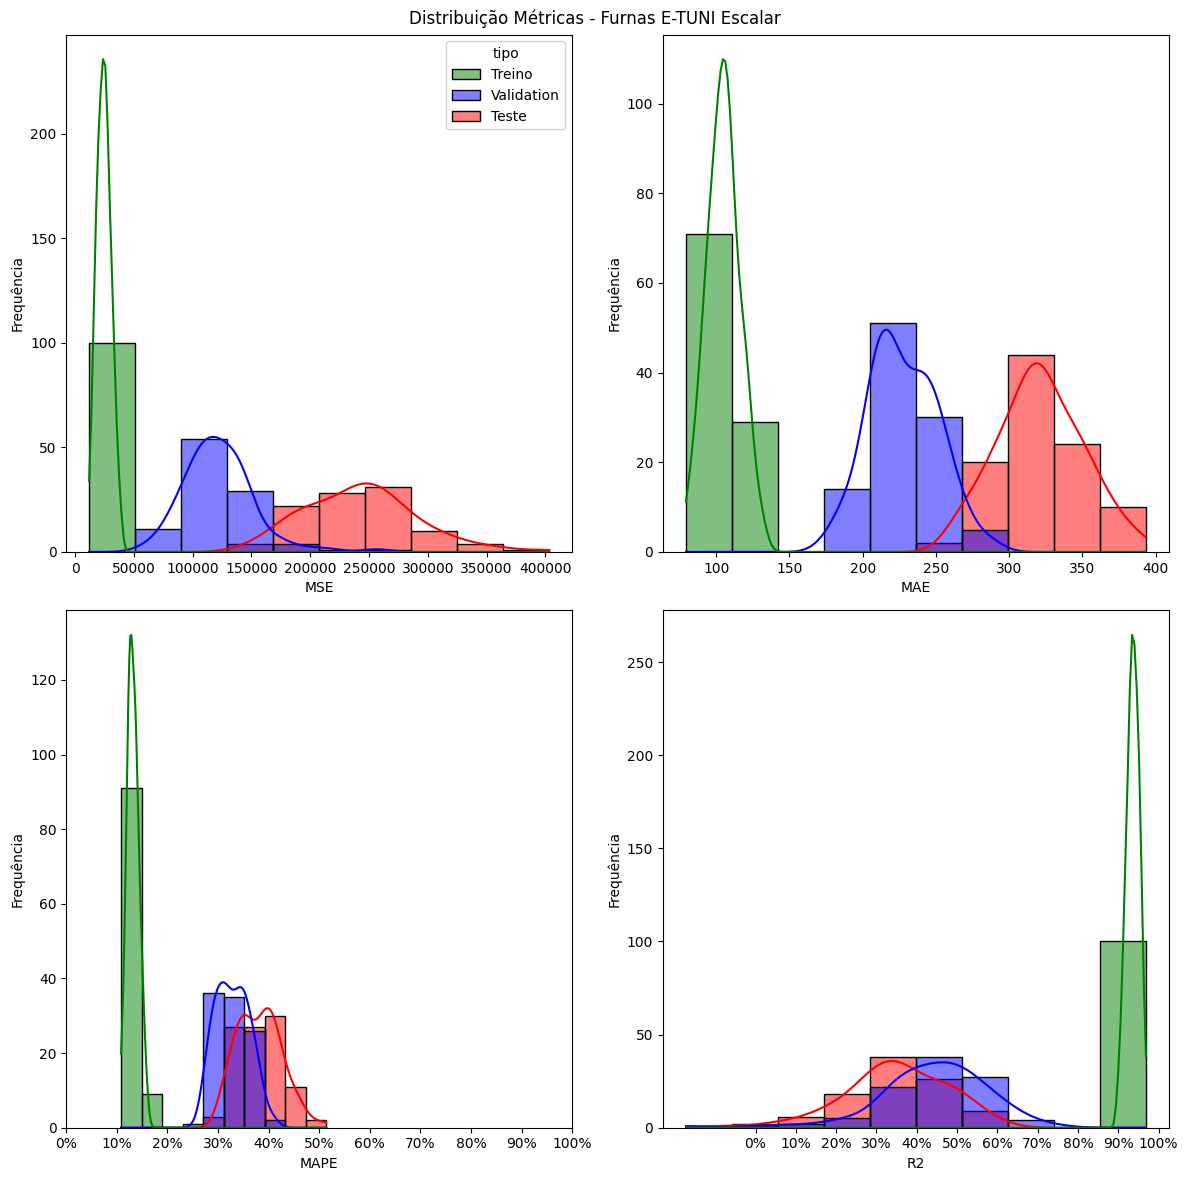

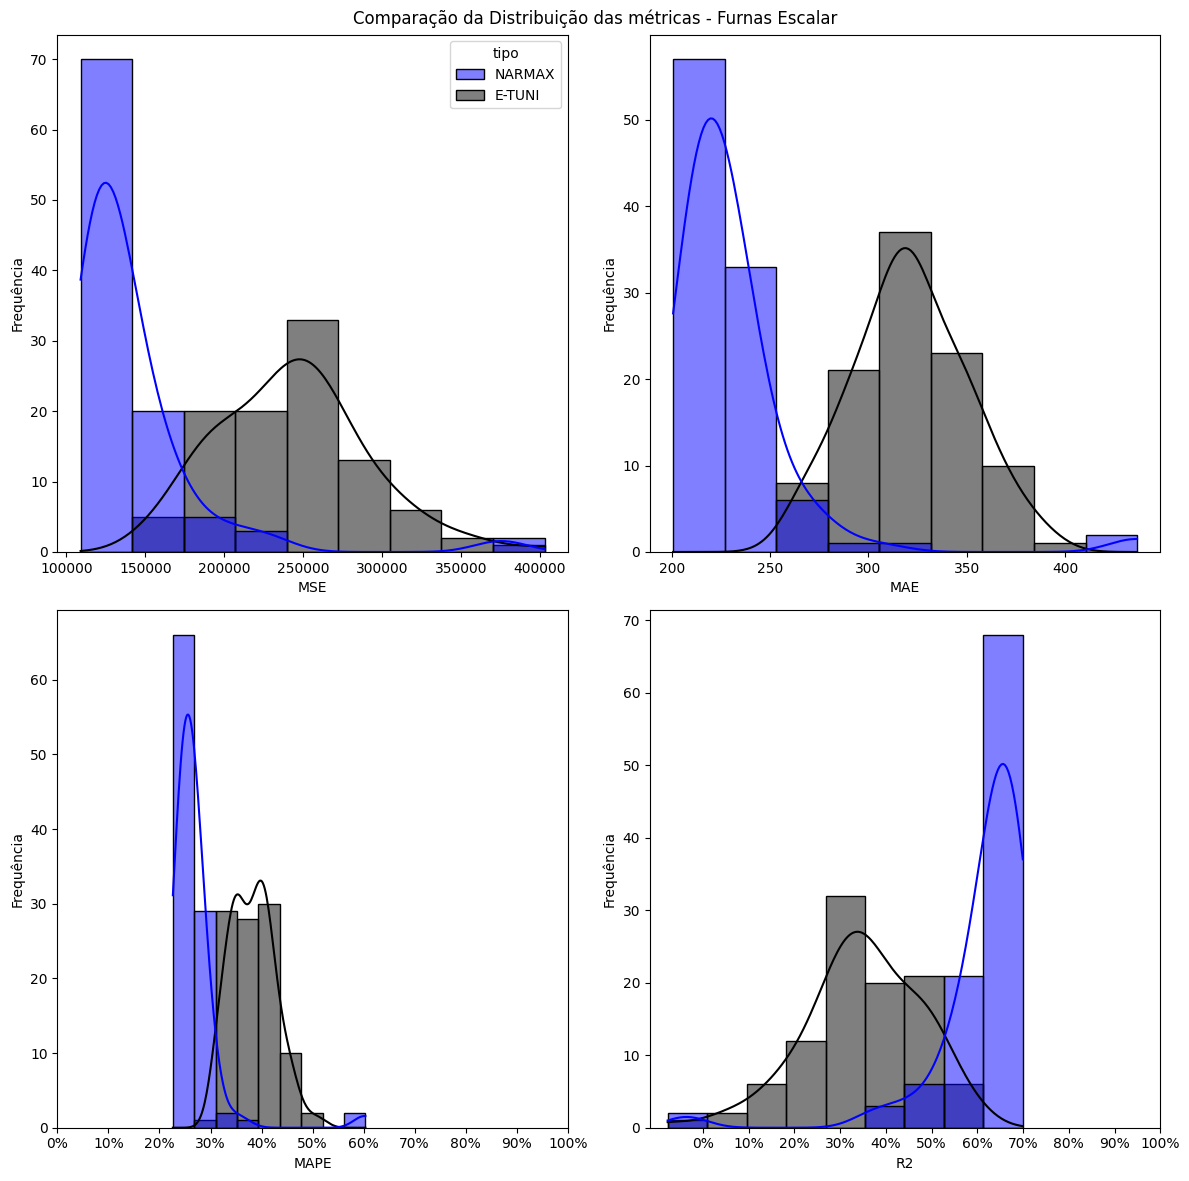

In [11]:
plot_distribution_metrics(all_results_furnas_narmax_escalar, 'Furnas NARMAX Escalar')
plot_distribution_metrics(all_results_furnas_etuni_escalar, 'Furnas E-TUNI Escalar')
for metric in ['MSE', 'MAE', 'MAPE', 'R2']:
    wilcoxon_rank_models(all_results_furnas_narmax_escalar, all_results_furnas_etuni_escalar, "Furnas Escalar", metric)

model_comparison_distribution_metrics(all_results_furnas_narmax_escalar, all_results_furnas_etuni_escalar, 'Furnas Escalar')

# Vetorial

Distribution Metrics - Camargos NARMAX Vetorial


MSE                                                     \
                   mean         std          min          max       median   
tipo                                                                         
Teste       2639.557977  230.351495  2308.063091  4148.002414  2589.501785   
Treino      2610.441659  332.521414  2128.725350  4369.480641  2535.461560   
Validation  1543.484107  222.786031  1186.550801  2625.621319  1488.587866   

                  MAE                                                 MAPE  \
                 mean       std        min        max     median      mean   
tipo                                                                         
Teste       32.904061  2.252633  29.730777  46.342548  32.429732  0.257516   
Treino      32.717872  2.766162  28.853462  46.322542  31.981251  0.247638   
Validation  29.879068  3.432986  24.017976  46.072228  28.925744  0.341229   

                                                          R2            \
                 std       min       max    median      mean       std   
tipo                                                                     
Teste       0.029346  0.217719  0.434291  0.251949  0.617764  0.033357   
Treino      0.031050  0.207434  0.404296  0.239045  0.635925  0.046376   
Validation  0.061134  0.245327  0.676847  0.325506  0.575225  0.061312   

                                          
                 min       max    median  
tipo                                      
Teste       0.399325  0.665768  0.625012  
Treino      0.390595  0.703110  0.646383  
Validation  0.277416  0.673455  0.590333

Distribution Metrics - Camargos E-TUNI Vetorial


MSE                                                     \
                   mean         std          min          max       median   
tipo                                                                         
Teste       3094.016909  435.516955  2599.858393  5863.739808  3017.934052   
Treino      2677.198068  394.635797  2306.770346  5682.553091  2608.309691   
Validation  1516.989253  177.081584  1247.747183  2558.658449  1491.670927   

                  MAE                                                 MAPE  \
                 mean       std        min        max     median      mean   
tipo                                                                         
Teste       36.537334  3.253295  32.694863  57.623101  36.094534  0.293329   
Treino      33.236772  2.977589  30.454426  55.610760  32.678275  0.254626   
Validation  27.550397  2.202004  23.447408  39.315055  26.988094  0.276491   

                                                          R2            \
                 std       min       max    median      mean       std   
tipo                                                                     
Teste       0.037546  0.241921  0.527314  0.288474  0.551953  0.063068   
Treino      0.029862  0.228349  0.482786  0.249603  0.626615  0.055039   
Validation  0.032009  0.215108  0.471752  0.268815  0.582517  0.048734   

                                          
                 min       max    median  
tipo                                      
Teste       0.150868  0.623513  0.562971  
Treino      0.207463  0.678278  0.636223  
Validation  0.295844  0.656614  0.589485


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Vetorial(MSE):
Statistic: 125.0
p-value: 1.5579198910001613e-16

Median MSE values:
NARMAX: 2589.5018
E-TUNI: 3017.9341

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Vetorial(MAE):
Statistic: 253.0
p-value: 5.634385341890625e-15

Median MAE values:
NARMAX: 32.4297
E-TUNI: 36.0945

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Camargos Vetorial(MAPE):
Statistic: 453.0
p-value: 1.0468004235982915e-12

Median MAPE values:
NARMAX: 0.2519
E-TUNI: 0.2885

At 0.05 significance level:
Reject H0: There is a sig

/tmp/ipykernel_9416/2692491723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narmax['tipo'] = 'NARMAX'
/tmp/ipykernel_9416/2692491723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etuni['tipo'] = 'E-TUNI'


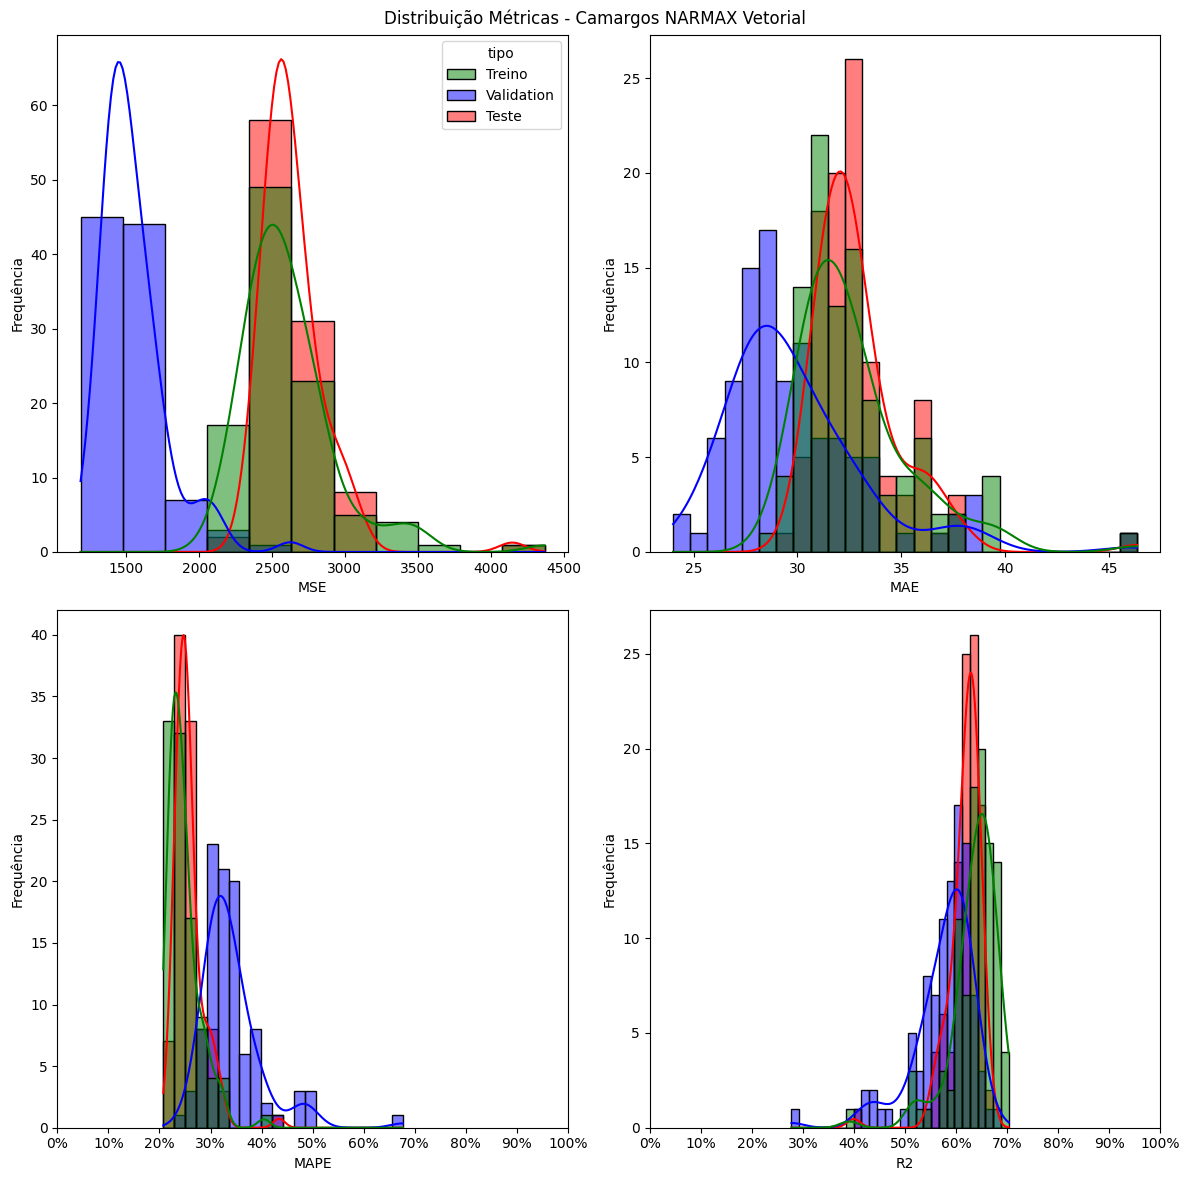

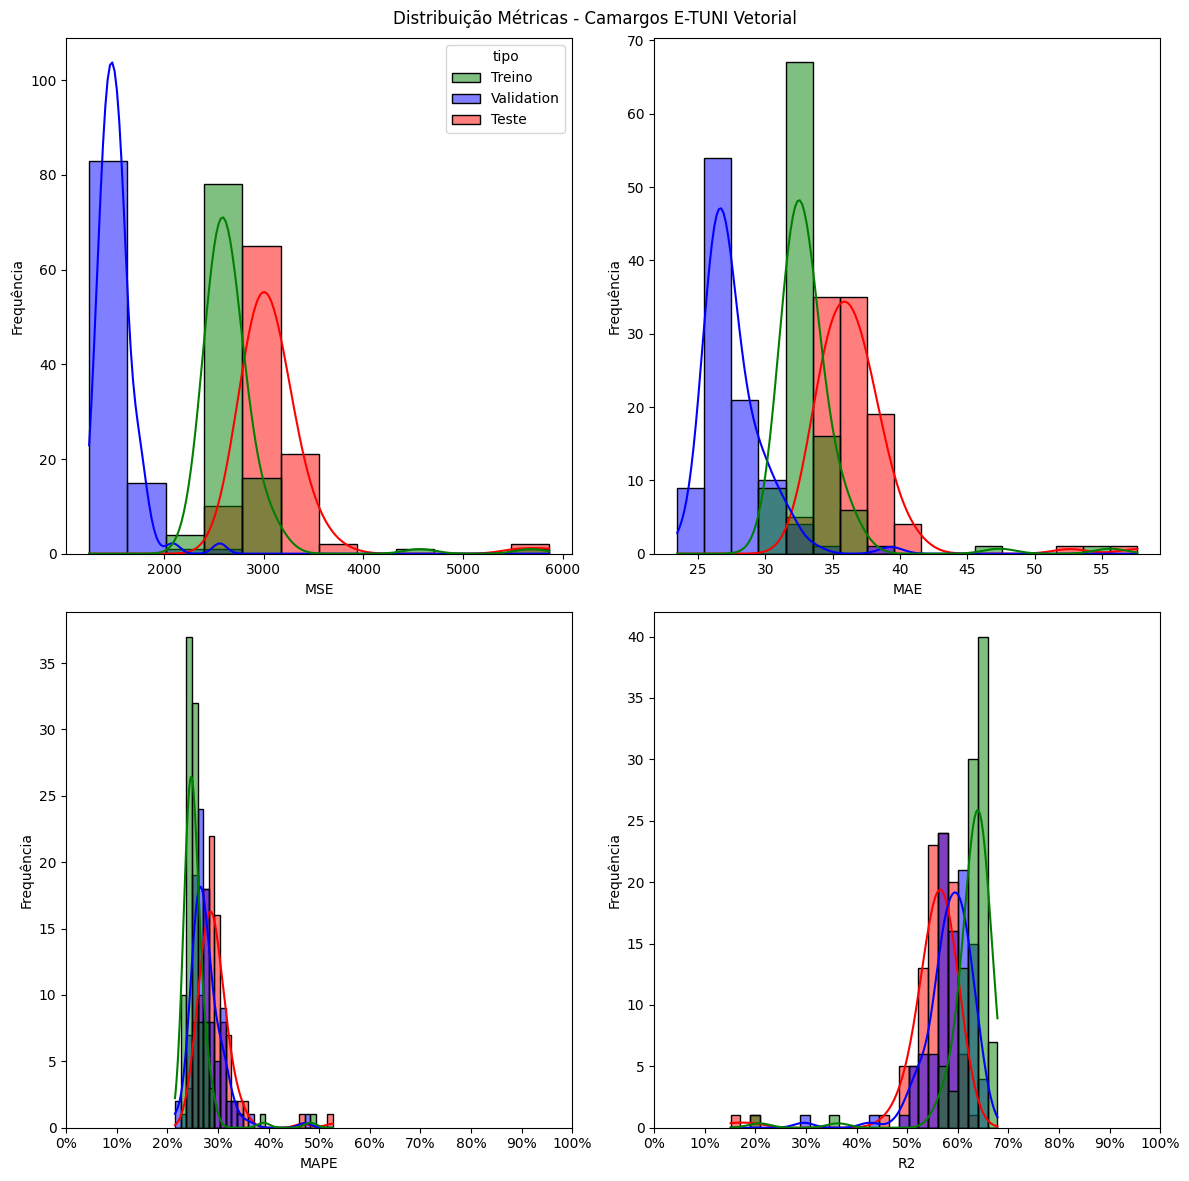

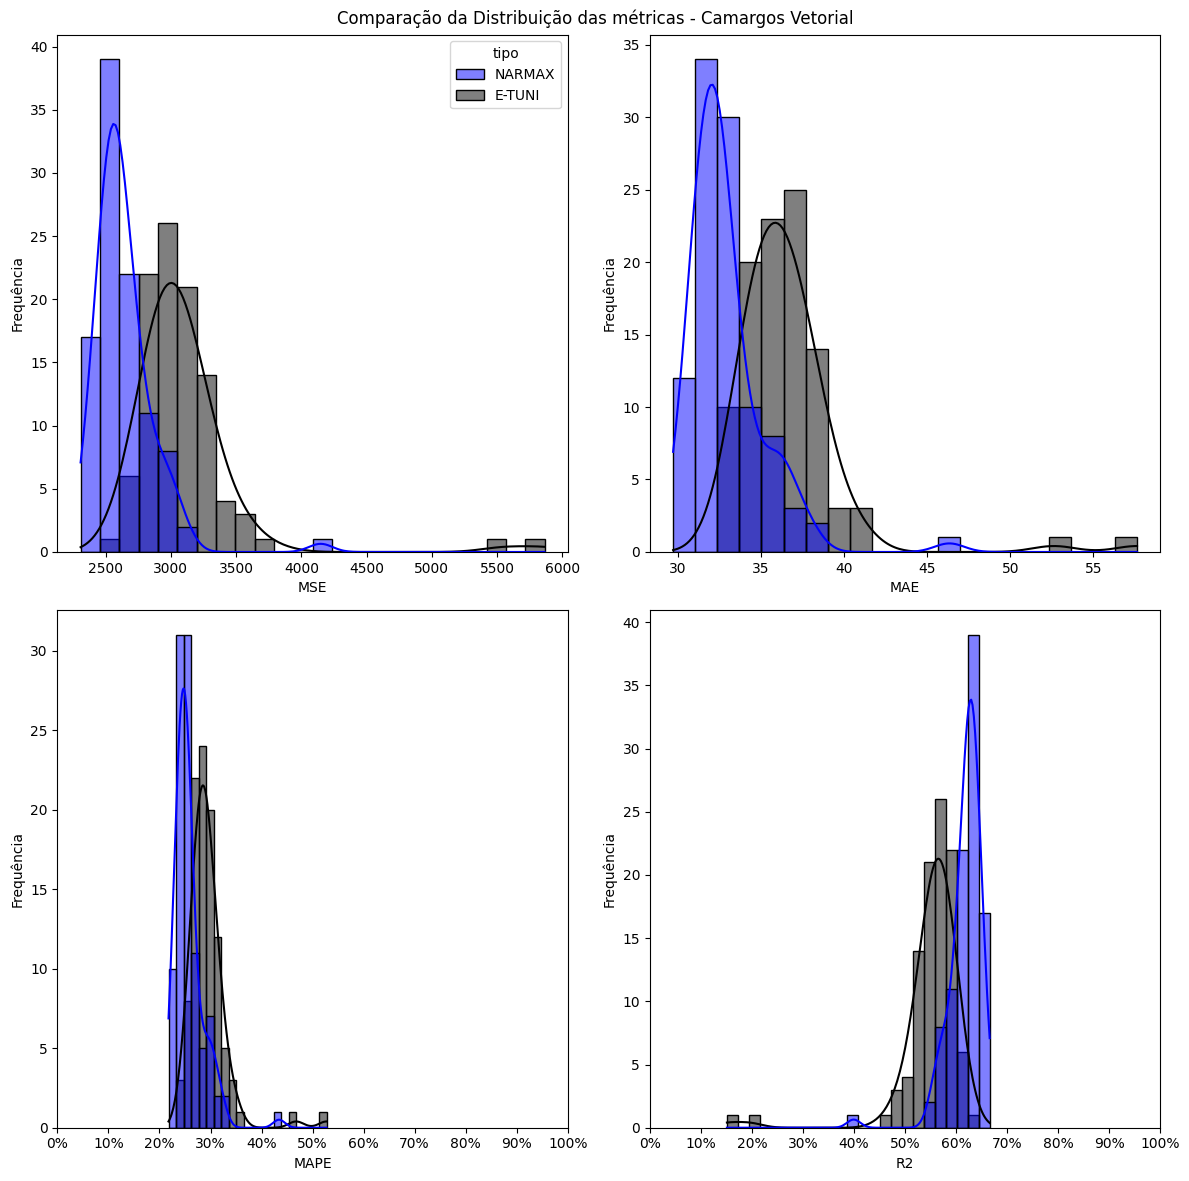

In [12]:
plot_distribution_metrics(all_results_camargos_narmax_vetorial, 'Camargos NARMAX Vetorial')
plot_distribution_metrics(all_results_camargos_etuni_vetorial, 'Camargos E-TUNI Vetorial')
for metric in ['MSE', 'MAE', 'MAPE', 'R2']:
    wilcoxon_rank_models(all_results_camargos_narmax_vetorial, all_results_camargos_etuni_vetorial, "Camargos Vetorial", metric)

model_comparison_distribution_metrics(all_results_camargos_narmax_vetorial, all_results_camargos_etuni_vetorial, 'Camargos Vetorial')

Distribution Metrics - Furnas NARMAX Vetorial


MSE                                              \
                     mean           std            min            max   
tipo                                                                    
Teste       168161.638848  27024.736026  136002.280239  375747.868879   
Treino      116733.292581  30638.598608   97350.088440  384679.003782   
Validation  104907.227842  21118.951905   78413.624088  269703.007519   

                                  MAE                                     \
                   median        mean        std         min         max   
tipo                                                                       
Teste       162909.923839  276.055596  27.593778  241.775687  489.933205   
Treino      111288.876638  223.616429  31.174347  200.702018  482.608658   
Validation  100651.500869  238.267726  30.717457  198.321703  457.992887   

                            MAPE                                          \
                median      mean       std       min       max    median   
tipo                                                                       
Teste       270.519530  0.352218  0.053409  0.282578  0.771124  0.342377   
Treino      216.704312  0.258920  0.051633  0.220896  0.683882  0.247968   
Validation  233.887790  0.388962  0.085541  0.308166  1.026722  0.374311   

                  R2                                          
                mean       std       min       max    median  
tipo                                                          
Teste       0.550673  0.072210 -0.003997  0.636602  0.564705  
Treino      0.696530  0.079651 -0.000043  0.746921  0.710684  
Validation  0.520406  0.096548 -0.232976  0.641524  0.539861

Distribution Metrics - Furnas E-TUNI Vetorial


MSE                                              \
                     mean           std            min            max   
tipo                                                                    
Teste       177225.636403  12657.427844  150583.957129  213628.536549   
Treino      110651.959578   4607.925370   97949.959134  124369.697088   
Validation   92780.834737  10364.184290   69805.643935  122536.051035   

                                  MAE                                     \
                   median        mean        std         min         max   
tipo                                                                       
Teste       176210.978083  281.547350  13.003137  251.462158  310.955301   
Treino      110537.694941  221.510156   4.537071  208.989822  235.308178   
Validation   93284.254929  210.692253  12.125670  178.947594  252.036370   

                            MAPE                                          \
                median      mean       std       min       max    median   
tipo                                                                       
Teste       280.657455  0.338390  0.026825  0.281946  0.412768  0.335046   
Treino      221.549041  0.253123  0.007172  0.233510  0.271134  0.252711   
Validation  210.315041  0.304337  0.020467  0.256096  0.373850  0.303985   

                  R2                                          
                mean       std       min       max    median  
tipo                                                          
Teste       0.526454  0.033821  0.429185  0.597640  0.529165  
Treino      0.712340  0.011979  0.676678  0.745361  0.712637  
Validation  0.575843  0.047381  0.439814  0.680876  0.573541


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Furnas Vetorial(MSE):
Statistic: 1081.0
p-value: 6.872193234754664e-07

Median MSE values:
NARMAX: 162909.9238
E-TUNI: 176210.9781

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Furnas Vetorial(MAE):
Statistic: 1340.0
p-value: 4.6130169531979994e-05

Median MAE values:
NARMAX: 270.5195
E-TUNI: 280.6575

At 0.05 significance level:
Reject H0: There is a significant difference between the models

--------------------------------------------------


--------------------------------------------------

Wilcoxon Signed-Ranks Test Results for Furnas Vetorial(MAPE):
Statistic: 1890.0
p-value: 0.029011054990631654

Median MAPE values:
NARMAX: 0.3424
E-TUNI: 0.3350

At 0.05 significance level:
Reject H0: There is a si

/tmp/ipykernel_9416/2692491723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narmax['tipo'] = 'NARMAX'
/tmp/ipykernel_9416/2692491723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etuni['tipo'] = 'E-TUNI'


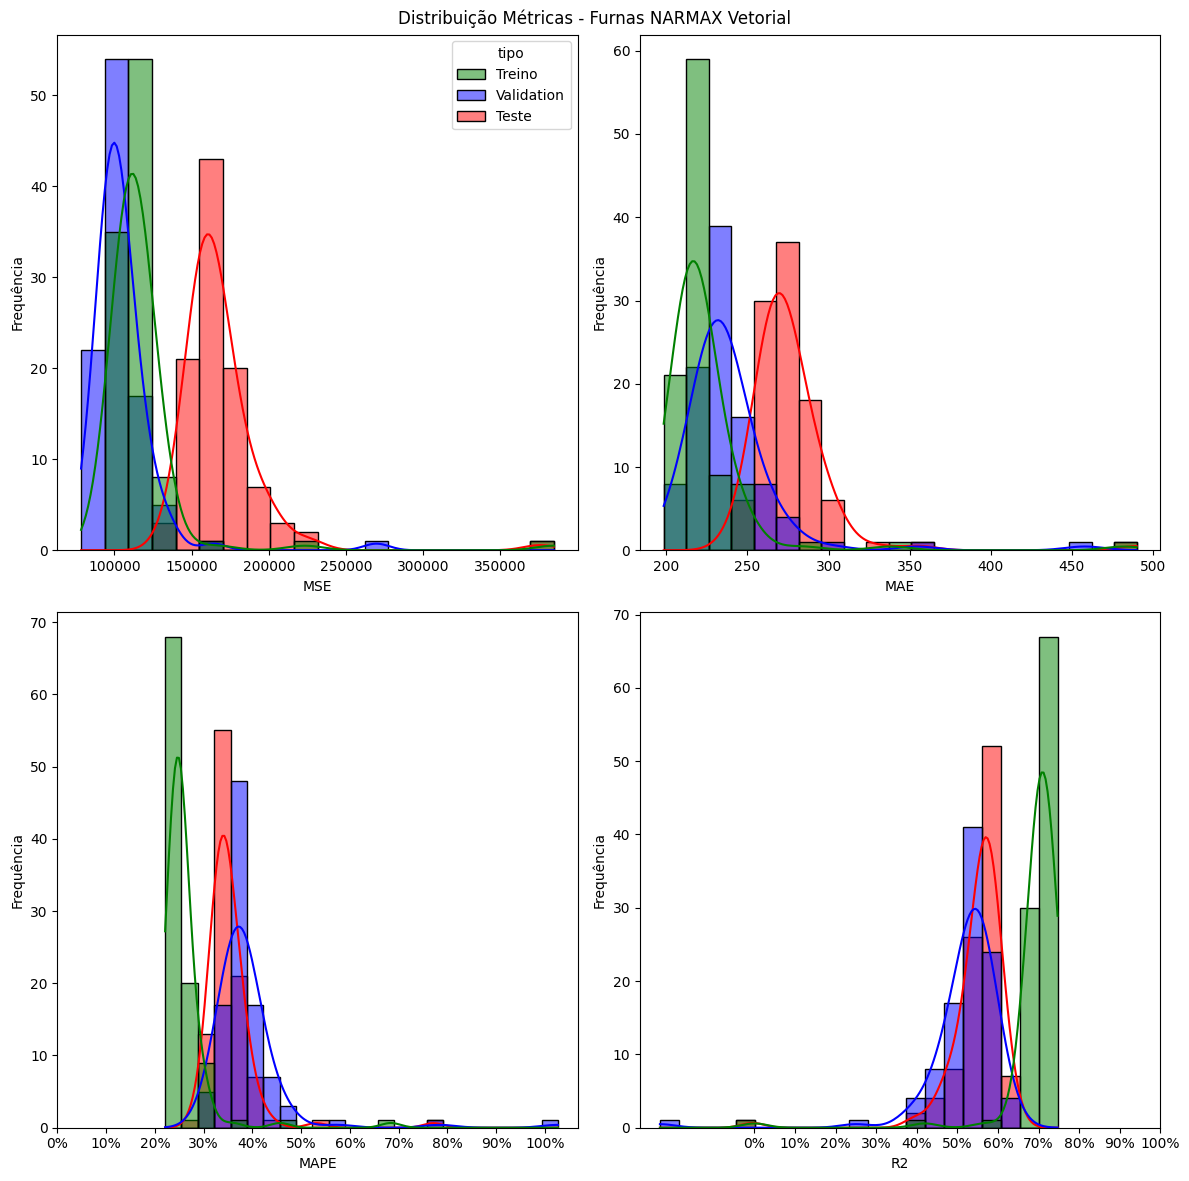

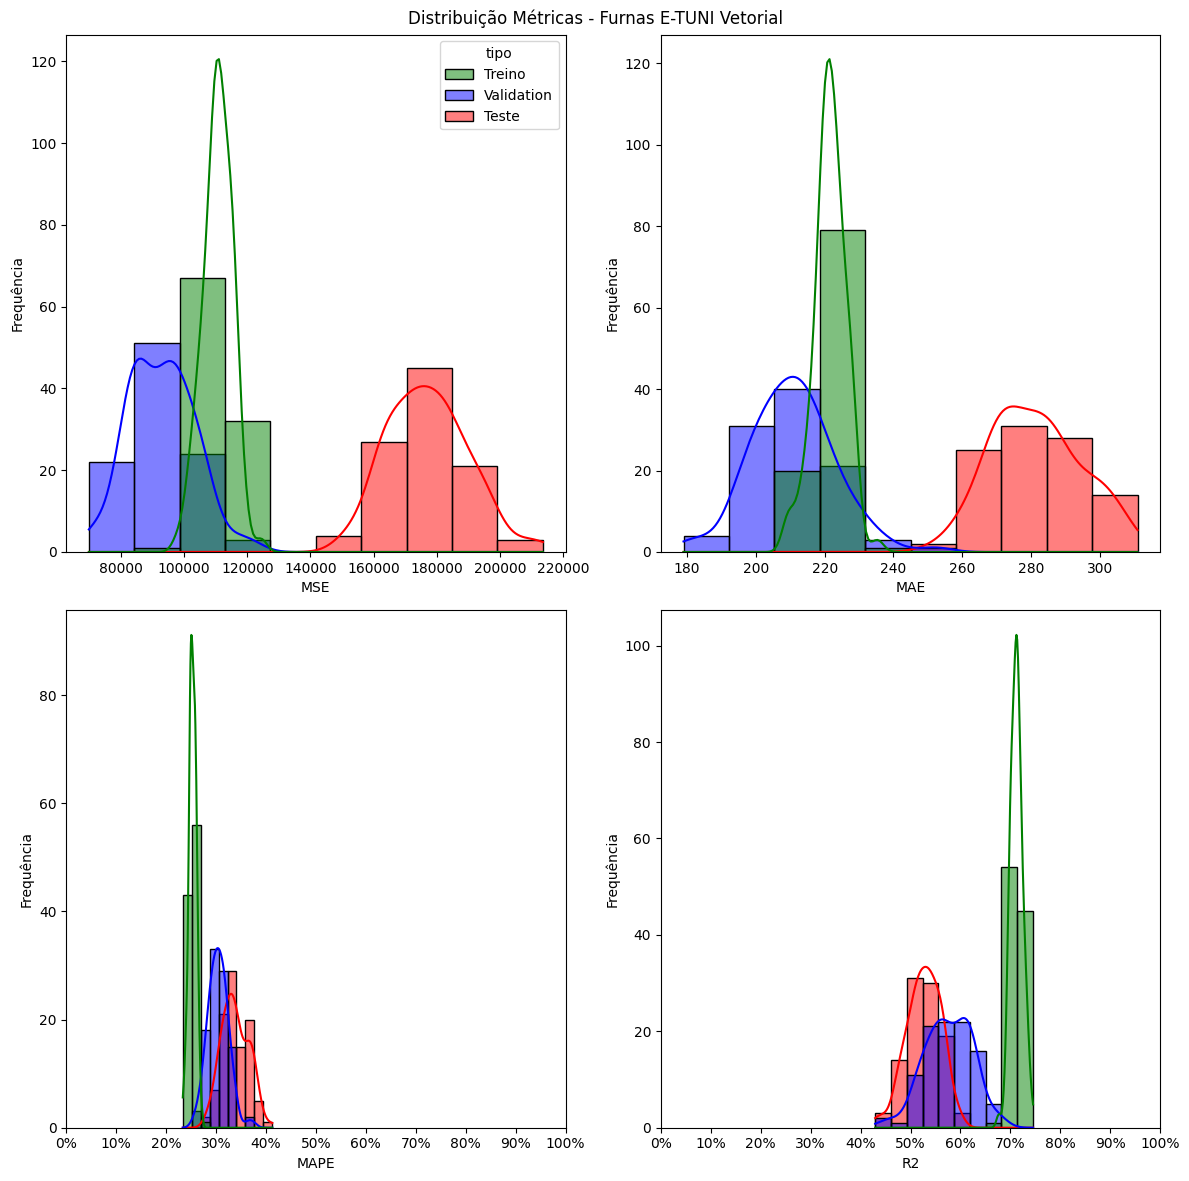

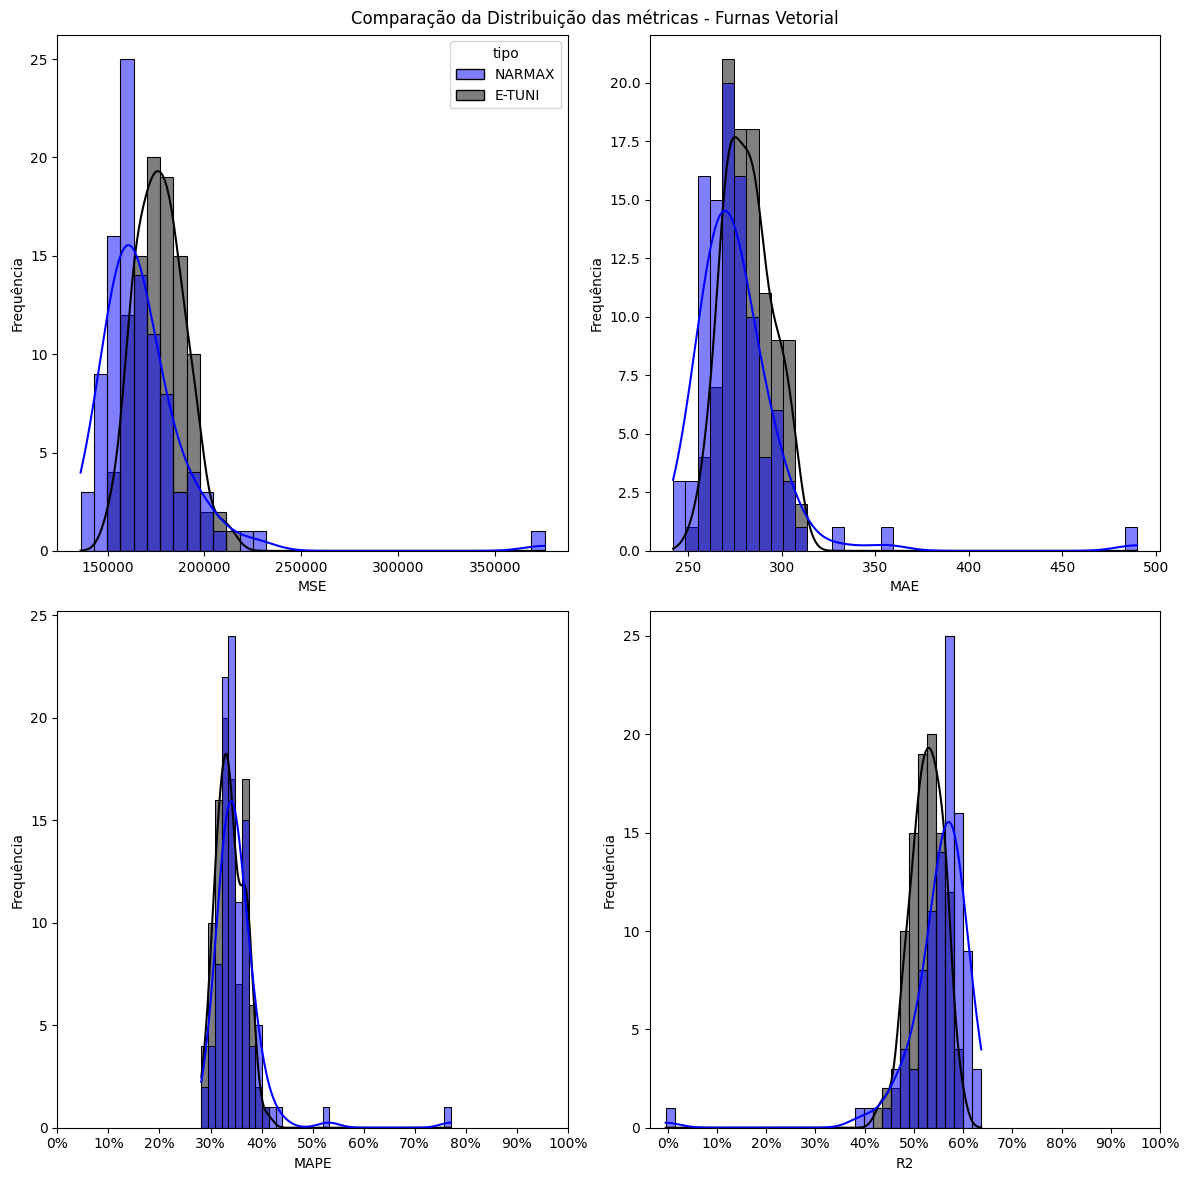

In [13]:
plot_distribution_metrics(all_results_furnas_narmax_vetorial, 'Furnas NARMAX Vetorial')
plot_distribution_metrics(all_results_furnas_etuni_vetorial, 'Furnas E-TUNI Vetorial')
for metric in ['MSE', 'MAE', 'MAPE', 'R2']:
    wilcoxon_rank_models(all_results_furnas_narmax_vetorial, all_results_furnas_etuni_vetorial, "Furnas Vetorial", metric)

model_comparison_distribution_metrics(all_results_furnas_narmax_vetorial, all_results_furnas_etuni_vetorial, 'Furnas Vetorial')

In [ ]:
i = 0
teste =  pd.read_csv(f'../Results/E-TUNI/Camargos/Escalar/Samples/etuni_camargos_pred_sample_{i}.csv')
teste


,date,real_norm,real,pred_norm,pred,tipo,sample
0,1932-01-01,0.765683,449.0,0.666656,395.327446,1. train,0
1,1932-02-01,0.571956,344.0,0.580237,348.488384,1. train,0
2,1932-03-01,0.332103,214.0,0.327663,211.593563,1. train,0
3,1932-04-01,0.070111,72.0,0.093588,84.724633,1. train,0
4,1932-05-01,0.062731,68.0,0.054582,63.583398,1. train,0
...,...,...,...,...,...,...,...
967,2012-08-01,0.049815,61.0,0.046405,59.151480,3. test,0
968,2012-09-01,0.033210,52.0,0.119955,99.015785,3. test,0
969,2012-10-01,0.044280,58.0,0.081697,78.279974,3. test,0
970,2012-11-01,0.107011,92.0,0.072649,73.375602,3. test,0
